# 2019 Sales Datasets EDA 

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline


# Merging  the 12 months datasets into single dataset


In [2]:
# Open the zip file
with zipfile.ZipFile("SalesDatasets.zip", "r") as zip_file:

    # Get a list of all the files in the zip file
    file_names = zip_file.namelist()

    # Iterate over the list of files and read each file as a Pandas DataFrame
    dataframes = []
    for file_name in file_names:
        dataframe = pd.read_csv(zip_file.open(file_name))
        dataframes.append(dataframe)

    # Close the zip file
    zip_file.close()

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dataframes)
df.reset_index(inplace=True)


In [3]:
# Print the combined DataFrame
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.shape

(186850, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


# Data Preprocsing 

### Uniqueness Categorical Variables

Let's have a look at categorical variables. How many unique values of these variables.


In [6]:
# getting the Uniqueness catrgorical variable
Objects = df.select_dtypes(['object']).columns 
for col in Objects:
    print(f'{col} : {df[col].nunique()} unique value(s)')

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


### missing values
Let's check how many missing values do we have

In [7]:
df.isna().sum()

index                 0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df.columns

Index(['index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address'],
      dtype='object')

<AxesSubplot:>

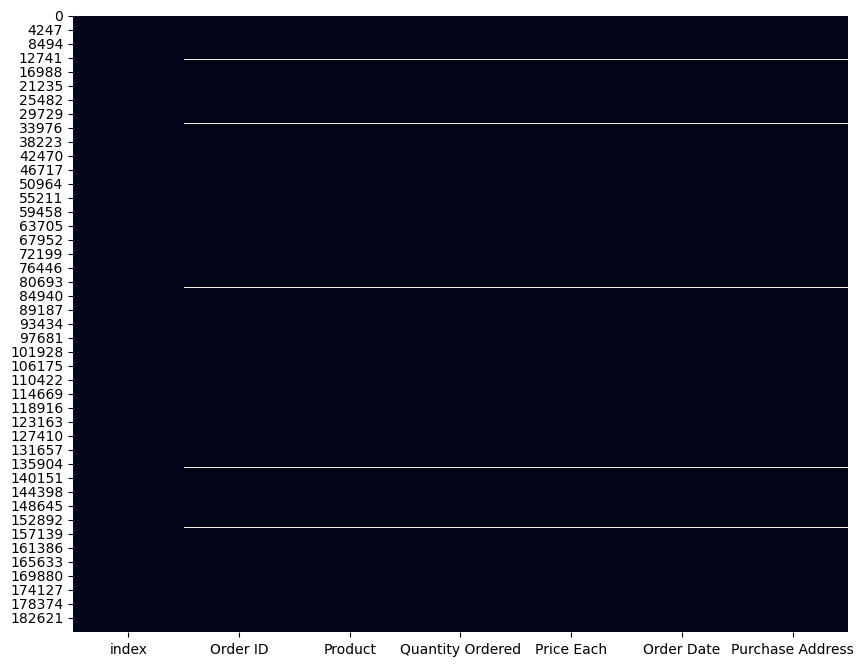

In [9]:
plt.figure(figsize=(10, 8))
# Define a function to annotate the missing values
sns.heatmap(df.isnull(),cbar=False)

As shown in the graph the missing values is relativly small  comapred to the total values so we will delete all the mssing values .

In [10]:
df = df.dropna(axis=0)

### Remove the duplicated data

In [11]:
#count of duplicated data
df.duplicated().sum()

1

In [12]:
df = df.drop_duplicates()

### Change the data types of data 

In [13]:
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       354
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

As show in the result there is a type error of the quantity order , since the value is object not int 

In [14]:
df[df['Quantity Ordered']=='Quantity Ordered']

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
185164,10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
#since the row that contains Quantity Ordered has no meaning, we will drop the row

# Create a boolean mask for the rows that you want to drop
condition = df['Quantity Ordered']=='Quantity Ordered'
boolean_mask = df.loc[condition]
# Drop the rows that match the boolean mask
df = df.drop(boolean_mask.index)


In [16]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [17]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [18]:
df.shape

(185950, 7)

the shape of the data after the preproccessing 

# Feature Creation  

In [19]:
# extract the city from the purchase address
# extract thr total sales form the quantity * price each

# Extracting the city and state from the Purchase Address 

In [20]:
df['State']=df['Purchase Address'].apply(lambda x:x.strip().split(',')[2][:3])
df['City']=df['Purchase Address'].apply(lambda x:x.split(',')[1])


In [21]:
df['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

In [22]:
df['State'].value_counts()

 CA    74337
 NY    24876
 TX    24725
 MA    19934
 GA    14881
 WA    14732
 OR    10010
 ME     2455
Name: State, dtype: int64

In [23]:
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [24]:
df

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,City,Month,Day
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",TX,Dallas,4,19
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",MA,Boston,4,7
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",CA,Los Angeles,4,12
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",CA,Los Angeles,4,12
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",CA,Los Angeles,4,30
...,...,...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",CA,Los Angeles,9,17
186846,11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",CA,San Francisco,9,1
186847,11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",CA,San Francisco,9,23
186848,11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",CA,San Francisco,9,19


In [25]:
#create column total sales 
df['Total Sales']=df['Quantity Ordered']*df['Price Each']

# drop Purchase Address 

In [26]:
df=df.drop('Purchase Address',axis=1)

In [27]:
#common products bought togather 
df['Order ID'].value_counts()

160873    5
178158    4
277875    4
196615    4
304802    4
         ..
158177    1
158178    1
158179    1
158180    1
259357    1
Name: Order ID, Length: 178437, dtype: int64

# EDA 

In [28]:
df

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,State,City,Month,Day,Total Sales
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,TX,Dallas,4,19,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,MA,Boston,4,7,99.99
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,CA,Los Angeles,4,12,600.00
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,CA,Los Angeles,4,12,11.99
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,CA,Los Angeles,4,30,11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,CA,Los Angeles,9,17,8.97
186846,11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,CA,San Francisco,9,1,700.00
186847,11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,CA,San Francisco,9,23,700.00
186848,11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,CA,San Francisco,9,19,379.99


## EDA

- what are the top 5 purchased products ?  
- what is the price distribution ? 
- which city generate the highest sales ?  
- what is each city top purhed product ? 
- trend in purhcased date or time ? 
- is the sales increase in the weekend more than the weekday ? 
- what is the common thing bought in the weekend ? 
- What was the best month for sales? How much was earned that month?
- What time should we display adverstisement to maximize likelihood of customer's buying product?
- What products are most often sold together?
    

### Q: what are the top 5 purchased products in all cities ?

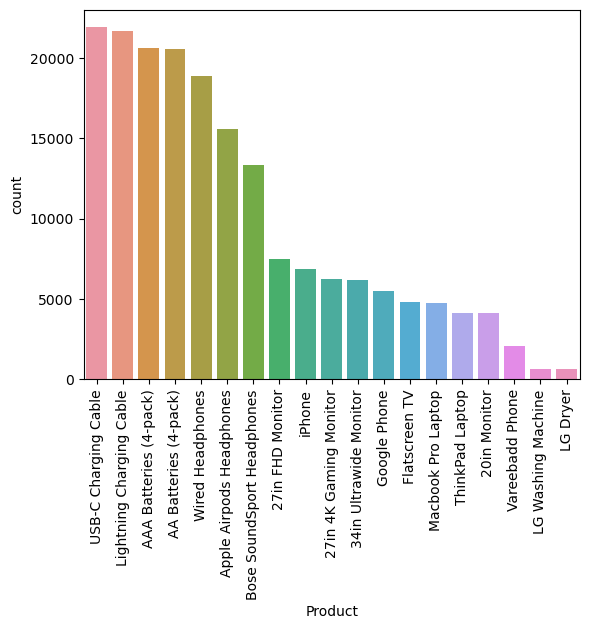

In [29]:
# count plot on single categorical variable
product_count=sns.countplot(x ='Product',order=df['Product'].value_counts().index, data = df)
product_count.set_xticklabels(product_count.get_xticklabels(), rotation=90)
plt.show()

the top 5 products that were purchased in usa were .........

### Q: what are the top  purchased products in each city ?

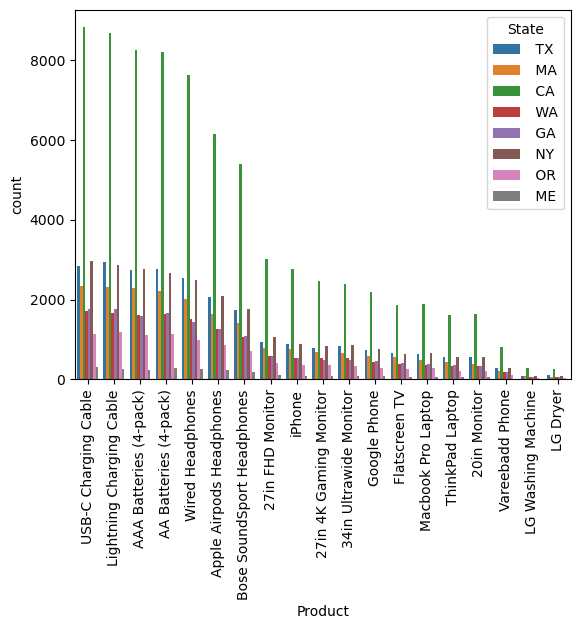

In [30]:
# count plot on single categorical variable
productState=sns.countplot(x ='Product',order=df['Product'].value_counts().index, hue='State', data = df)
productState.set_xticklabels(productState.get_xticklabels(), rotation=90)
plt.show()






As shown in the graph the majority of the products sold in CA more than any other state 

### Q: which city generate the highest sales ?

In [31]:
City_TSales=df[['City','Total Sales']].groupby(by='City').sum().sort_values(by='Total Sales',ascending=False)
City_TSales

,Total Sales
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58
Dallas,2767975.40
Seattle,2747755.48
Portland,2320490.61
Austin,1819581.75


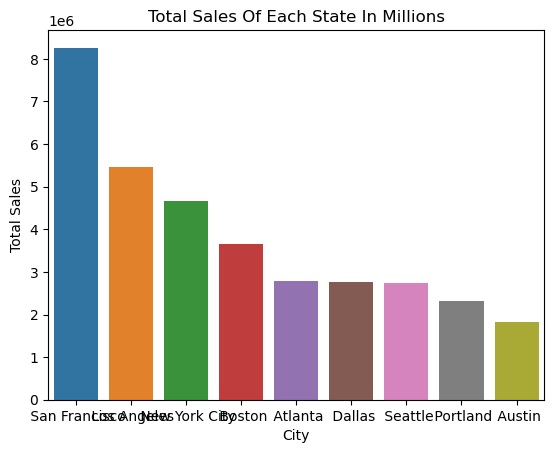

In [32]:
sns.barplot(x=City_TSales.index, y=City_TSales['Total Sales'], data=City_TSales)
plt.title('Total Sales Of Each State In Millions')
plt.show()

### Q: Sales Trend Over time ?  line chart 

Text(0.5, 1.0, 'Sales Trend Over Months In 2019 Year')

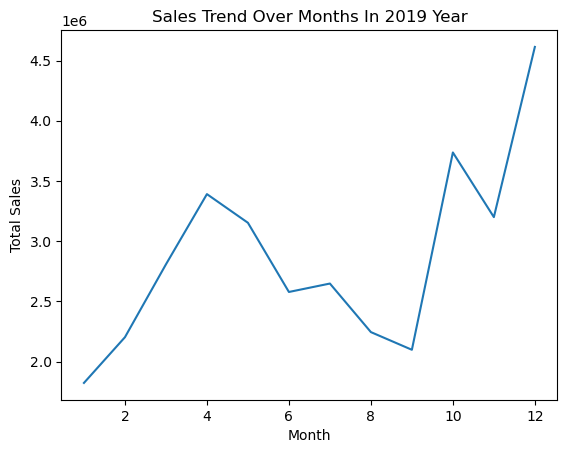

In [33]:
MonthTrend=df[['Month','Total Sales']].groupby(by='Month').sum().sort_values(by='Total Sales',ascending=False)
# sns.lineplot(x=MonthTrend.index, y=MonthTrend['Total Sales'], data=MonthTrend, markers=['o','^'])
sns.lineplot(x=MonthTrend.index, y=MonthTrend['Total Sales'], data=MonthTrend)
plt.title("Sales Trend Over Months In 2019 Year")

### is the sales differ in the weekend than the busniess days? (what is the average sales in the weekdays and the weekend days ?

In [34]:
df["Is Weekend"] = df['Order Date'].dt.dayofweek > 4

In [36]:
groupedMW=df.groupby(['Month', 'Is Weekend'])['Total Sales'].mean()
groupedMW

Month  Is Weekend
1      False         189.277490
       True          183.244502
2      False         185.118743
       True          180.868303
3      False         188.917001
       True          177.619941
4      False         188.321414
       True          177.800662
5      False         187.940048
       True          197.159506
6      False         187.417684
       True          195.784738
7      False         182.025891
       True          194.496717
8      False         186.038771
       True          191.593470
9      False         182.362925
       True          176.120651
10     False         183.403027
       True          186.571225
11     False         180.875854
       True          184.873544
12     False         185.689147
       True          182.097341
Name: Total Sales, dtype: float64

<AxesSubplot:xlabel='Month,Is Weekend'>

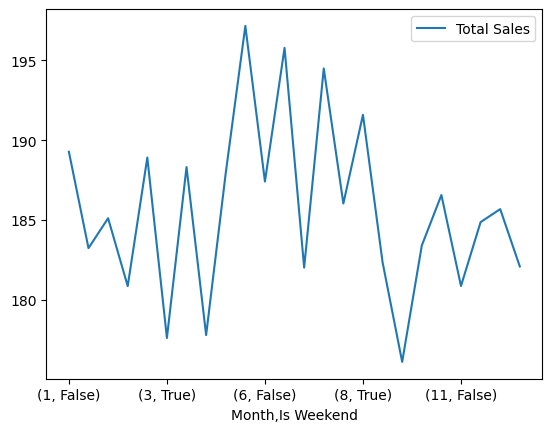

In [38]:
groupedMW.plot(kind='line', legend=True)

In [39]:
groupedMW.index.get_level_values(0).unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

### Q: what is the common thing bought in the weekend ?

In [40]:
Weekend_Products=df[['Is Weekend', 'Product']].where(df['Is Weekend'] == True)['Product'].value_counts().to_frame()

Weekend_Products

,Product
Lightning Charging Cable,6248
USB-C Charging Cable,6233
AAA Batteries (4-pack),5842
AA Batteries (4-pack),5830
Wired Headphones,5359
Apple Airpods Headphones,4440
Bose SoundSport Headphones,3900
27in FHD Monitor,2197
iPhone,1892
34in Ultrawide Monitor,1755


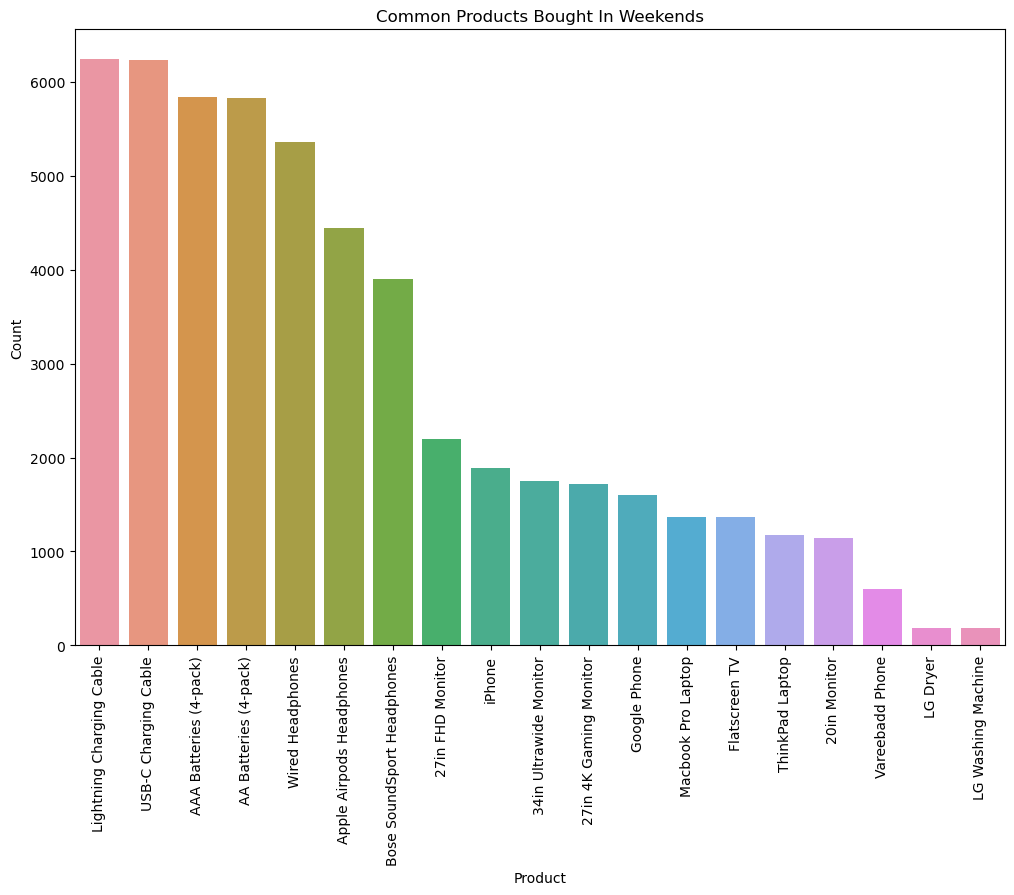

In [41]:
plt.figure(figsize=(12, 8))

# Create a bar plot
plotting=sns.barplot(x=Weekend_Products.index, y='Product', data=Weekend_Products)
plotting.set_xticklabels(plotting.get_xticklabels(), rotation=90)
plt.ylabel("Count")
plt.xlabel("Product")
plt.title("Common Products Bought In Weekends")

# Display the plot
plt.show()

In [44]:
df1 = (df.groupby('Order ID')['Product']
        .agg(frozenset)
        .value_counts()
        .rename(lambda x: ', '.join(sorted(x)))
        .rename_axis('bucket')
        .reset_index(name='count'))

df1=df1[df1['bucket'].str.contains(",")]

df1.sort_values(by='count',ascending=False).head()



# df1 = (df.groupby('transaction_no')['category']
#         .agg(lambda x: ', '.join(sorted(set((x)))))
#         .value_counts()
#         .rename_axis('bucket')
#         .reset_index(name='count')
#         )
# print (df1)



,bucket,count
17,"Lightning Charging Cable, iPhone",895
18,"Google Phone, USB-C Charging Cable",869
21,"Wired Headphones, iPhone",374
22,"USB-C Charging Cable, Vareebadd Phone",318
23,"Google Phone, Wired Headphones",311


Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  895
  orders, and Google Phone, USB-C Charging Cable ranked second with  869
  orders.

### before exporting the file i want to create another column for the category of the products to be used in power bi 

In [45]:
df.to_csv(r"C:\Users\Lenovo\Documents\TotalSales.csv")

In [46]:
df.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

we have 8 product category and they are :  
Chargers 
Headphone
Phones
Laptops
Monitors
Batteries
Dryers
Washing Machines


In [47]:
def product_category(x):
    cat=""
    x=x.lower()
    if "charging" in x:
        cat="Chargers"
    elif "headphones" in x:
        cat="Headphones"
    elif "monitor" in x:
        cat="Monitors"
    elif "phone" in x:
        cat="Phones"
    elif "laptop" in x:
        cat="Laptops"
    elif "batteries" in x:
        cat="Batteries"
    elif "dryer" in x :
        cat="Dryers"
    elif "washing machine" in x :
        cat="Washing Machines"
    elif "tv" in x :
        cat="TV"
    else :
        return None 
    return cat
    

In [48]:
df['Product Category']=df['Product'].apply(product_category)

In [50]:
df.to_csv(r"C:\Users\Lenovo\Documents\TotalSalesCleaned.csv")